# Project: Investigate a TMBD Movie dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This TMBD Movie data set contains information about almost 11,000 movies which can be used to determine several correlations.

By the end of this report, the following questions posed should have been answered:

    1) Which properties are attributed to movies with high revenue?
    2) Which genre has the best and worst movie ranking?
    3) What year has the best vote average?
    4) Which genre pulls in the most revenue?
    5) Which year recorded the most revenue?
    6) Which genre is the most popular?
    7) Which genre has the most average vote?
    
    


In [332]:
# Use this cell to set up import statements for all of the packages that you
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [333]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('tmdb-movies.csv')
df.head()



,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [335]:
# To view the index number and label for each column
for i,v in enumerate(df.columns):
    print(i,v)

0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj


In [ ]:
#  types and look for instances of missing or possibly errant data.
# To display the number of rows and columns
df.shape

#### DATA TYPES & MISSING VALUES

In [ ]:
# To display a concise summary of the dataframe
df.info()

In [ ]:
# data type of release_date
type(df['release_date'][0])

In [ ]:
# To display columns with missing values
df.isnull().sum()

#### OBSERVATIONS

It can be observed that several values are missing from the dataframe. The following columns have missing values:

**imdb_id, cast, homepage, director, tagline, keywords, overview, genres, production_companies.**

It can also be observed that **release_date** data type is incorrect.

In [ ]:
# Display the number of unique values in each column
df.nunique()

In [ ]:
# Displays information about movies with both label at zero
df[(df['budget'] == 0) & (df['revenue'] == 0)]

In [ ]:
# Find movies without a runtime
df.query('runtime == 0')

In [ ]:
df.production_companies.value_counts()

In [ ]:
df.genres.value_counts()

In [ ]:
df.tagline.value_counts()

In [ ]:
df.keywords.value_counts()

In [ ]:
df.cast.value_counts()

In [ ]:
df.director.value_counts()

In [ ]:
# display number of duplicates
df.duplicated().sum()

In [ ]:
df.query('director == "Woody Allen"')

In [ ]:
# To display a descriptive statistics of the dataframe
df.describe()

## Data Cleaning

###  DROP EXTRANEOUS COLUMNS

In [336]:
#A few of the columns aren't relevant to our questions and it's redundant to have both release year and date. 

# dropping a few columns
df.drop(columns = ['id','homepage', 'overview', 'imdb_id', 'tagline','keywords', 'release_date'], inplace = True)

### DROP DUPLICATES

In [337]:
# drop duplicates
df.drop_duplicates(inplace = True)

In [338]:
# verify duplicates
df.duplicated().sum()

0

### DROP ROLLS

In [339]:
# drop rows with runtime of zero
zero_runtime = df.query('runtime == 0')
df.drop(zero_runtime.index, inplace = True)

In [340]:
# Drop rows without production companies
no_company = df[df['production_companies'].isnull()]
df.drop(no_company.index, inplace = True)

In [341]:
# drop rows without a cast
no_cast = df[df.cast.isnull()]
df.drop(no_cast.index, inplace = True)

In [342]:
# drop rows without a genre
no_genres = df[df.genres.isnull()]
df.drop(no_genres.index, inplace = True)

In [343]:
# drop rows without a director
no_director = df[df.director.isnull()] 
df.drop(no_director.index, inplace = True)

## CHANGING DATA TYPE

In [344]:
# changing  release year from int to str
df['release_year'] = df['release_year'].astype(str)

## Replacing pipe(|) to slash(/) in production companies 
It can be obeserved that within the production companies, some include both pipe and slash. Hence, pipes are replaced with slashes for consistency

In [345]:
# Replacing pipes with slashes
df['production_companies'] = df['production_companies'].str.replace('|','/')


# let's get companies without /
df[df['production_companies'].str.contains('|') == False].shape

(0, 14)

In [346]:
# verify the current info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9759 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9759 non-null   float64
 1   budget                9759 non-null   int64  
 2   revenue               9759 non-null   int64  
 3   original_title        9759 non-null   object 
 4   cast                  9759 non-null   object 
 5   director              9759 non-null   object 
 6   runtime               9759 non-null   int64  
 7   genres                9759 non-null   object 
 8   production_companies  9759 non-null   object 
 9   vote_count            9759 non-null   int64  
 10  vote_average          9759 non-null   float64
 11  release_year          9759 non-null   object 
 12  budget_adj            9759 non-null   float64
 13  revenue_adj           9759 non-null   float64
dtypes: float64(4), int64(4), object(6)
memory usage: 1.1+ MB


In [347]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,9759.000000,9.759000e+03,9.759000e+03,9759.000000,9759.000000,9759.000000,9.759000e+03,9.759000e+03
mean,0.695266,1.620089e+07,4.429013e+07,103.063736,239.597602,5.964535,1.944155e+07,5.712909e+07
std,1.037370,3.222692e+07,1.226599e+08,27.641529,603.361812,0.912967,3.568320e+07,1.515364e+08
min,0.000188,0.000000e+00,0.000000e+00,3.000000,10.000000,1.500000,0.000000e+00,0.000000e+00
25%,0.232931,0.000000e+00,0.000000e+00,91.000000,18.000000,5.400000,0.000000e+00,0.000000e+00
50%,0.420185,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,3.396151e+05,0.000000e+00
75%,0.777162,1.965000e+07,3.111596e+07,112.000000,173.500000,6.600000,2.479368e+07,4.317040e+07
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,4.250000e+08,2.827124e+09


In [348]:
df.quantile(q=0.89)

popularity      1.357116e+00
budget          4.762000e+07
revenue         1.141887e+08
runtime         1.250000e+02
vote_count      5.186200e+02
vote_average    7.000000e+00
budget_adj      5.877318e+07
revenue_adj     1.502555e+08
Name: 0.89, dtype: float64

# Categorical Variable 
To make the groupby easier, a categorical variable has been created using `pandas cut` function. This creates a new column called **movie_rank** with the following categories


**NOTE:** This ranks are based   

Movie Rank:  

        1. high = 80% to max  
        2) moderately high = 50% to 80%  
        3) moderately good = 25% to 50%  
        4) bad = min to 25%

In [349]:
bin_edges = [1.4, 5.4, 6.0, 7.0, 8.7]
bin_names = ['bad', 'okay', 'good', 'high']

In [350]:
df['movie_rank'] = pd.cut(df['vote_average'], bin_edges, labels = bin_names)

In [ ]:
# making two copies
#df1 = df.copy()
#df2 = df.copy()

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Which properties are attributed to movies with high revenue?

In [271]:
df.nunique();

In [351]:
# What kind of properties are associated with movies that have high revenues
# For high revenue
revenue_mean = df.revenue.mean()
high_revenue = df.query('revenue >= {}'.format(revenue_mean))
high_revenue.describe() 

,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,2041.000000,2.041000e+03,2.041000e+03,2041.000000,2041.000000,2041.000000,2.041000e+03,2.041000e+03
mean,1.671759,5.407046e+07,1.927170e+08,112.949535,848.561489,6.289564,6.216373e+07,2.422787e+08
std,1.822736,4.920753e+07,2.090377e+08,24.203506,1081.542994,0.737958,5.090611e+07,2.547234e+08
min,0.010335,0.000000e+00,4.433202e+07,44.000000,10.000000,3.400000,0.000000e+00,4.084947e+07
25%,0.760503,2.000000e+07,7.217958e+07,98.000000,205.000000,5.800000,2.579055e+07,9.126838e+07
50%,1.200825,4.000000e+07,1.195000e+08,110.000000,445.000000,6.300000,4.848671e+07,1.557366e+08
75%,1.928258,7.500000e+07,2.227242e+08,124.000000,1012.000000,6.800000,8.639749e+07,2.918792e+08
max,32.985763,3.800000e+08,2.781506e+09,705.000000,9767.000000,8.300000,3.683713e+08,2.827124e+09


In [352]:
high_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2041 entries, 0 to 10819
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   popularity            2041 non-null   float64 
 1   budget                2041 non-null   int64   
 2   revenue               2041 non-null   int64   
 3   original_title        2041 non-null   object  
 4   cast                  2041 non-null   object  
 5   director              2041 non-null   object  
 6   runtime               2041 non-null   int64   
 7   genres                2041 non-null   object  
 8   production_companies  2041 non-null   object  
 9   vote_count            2041 non-null   int64   
 10  vote_average          2041 non-null   float64 
 11  release_year          2041 non-null   object  
 12  budget_adj            2041 non-null   float64 
 13  revenue_adj           2041 non-null   float64 
 14  movie_rank            2041 non-null   category
dtypes: 

### Observation:
The tables inform that **less than one-quarter* of the total movies generated high revenue and are averaging a  vote count of almost 900 with a vote average of 6.2**. It also shows the **mininum and maximum vote average alongside the percentiles** - *with 25, 50 and 75 percentile of the movies rated 5.8, 6.3 and 6.8 respectively*, which means that the vote average 6.8 is better than 75% of the vote average and so on. It also shows the average revenue of movies is above 190 million.


### Research Question 2: Which Genres have the best and worst movie ranking?

In [353]:
# creating two new data frames with the following columns: 'genres','popularity', 'release_year', 'revenue', 'movie_rank'
locs = np.r_[0,2,7,9,10,11,14,1]
df1 = df.iloc[:,locs]
df2 = df.iloc[:,locs]
df1.columns;

In [354]:
# Split the genre column into a list to allow explode functon
df1['genres'] = df1['genres'].str.split('|')

C:\Anaconda\envs\mynew_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [355]:
df1 = df1.explode('genres')

In [356]:
# To allow for uniform index, the dataframe will be sorted by genres
df3 = df1.sort_values('genres', ascending = True).groupby('movie_rank')['genres'].value_counts().sort_index()

In [357]:
# Genres sorted by movierank 
df3['high'];

In [358]:
# creating an index function that returns the length of each dataframe
def indexs(data_frame):
    return np.arange(len(data_frame))

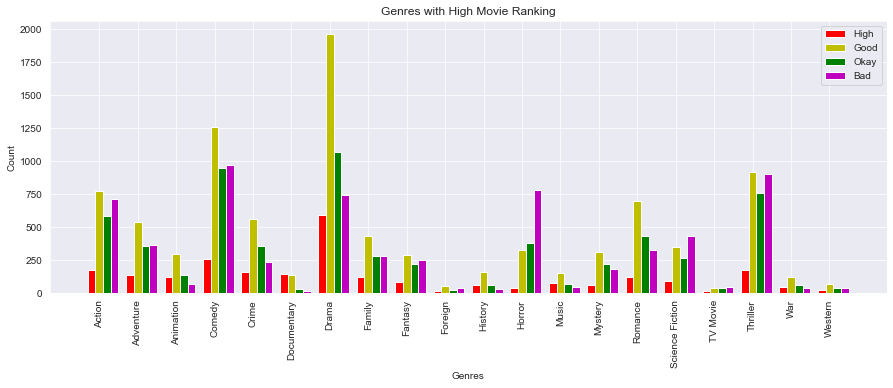

In [359]:
ind = indexs(df3['high'])
width = 0.2
plt.figure(figsize=(15,5))
plt.bar(ind, df3['high'], width, color = 'r', label = 'High');
plt.bar(ind + width, df3['good'], width, color = 'y', label = 'Good');
plt.bar(ind + width*2, df3['okay'], width, color = 'g', label = 'Okay')
plt.bar(ind + width*3, df3['bad'], width, color = 'm', label = 'Bad')
# Rotation of the bars names
plt.xticks(ind + width, df3['high'].index, rotation = 90);
plt.ylabel('Count');
plt.xlabel('Genres');
plt.title('Genres with High Movie Ranking');
plt.legend();

### Observation:
The plot clearly shows the correlation between genres and movie rank, with the drama genre having the highest number movies associated with the high, good and okay ranking categories, and the third highest with bad ranking. While genres such as: **War, Western, TV Movie and Foreign, have almost similar numbers in all the ranking categories**. It's also visbile that more good ranking movies were produced in almost all genres.  I

### Research Question 3: What year has the best vote average?

In [362]:
df1;

In [363]:
# Displays the vote average according to the release year
df4 = df1.groupby('release_year')['vote_average'].mean()

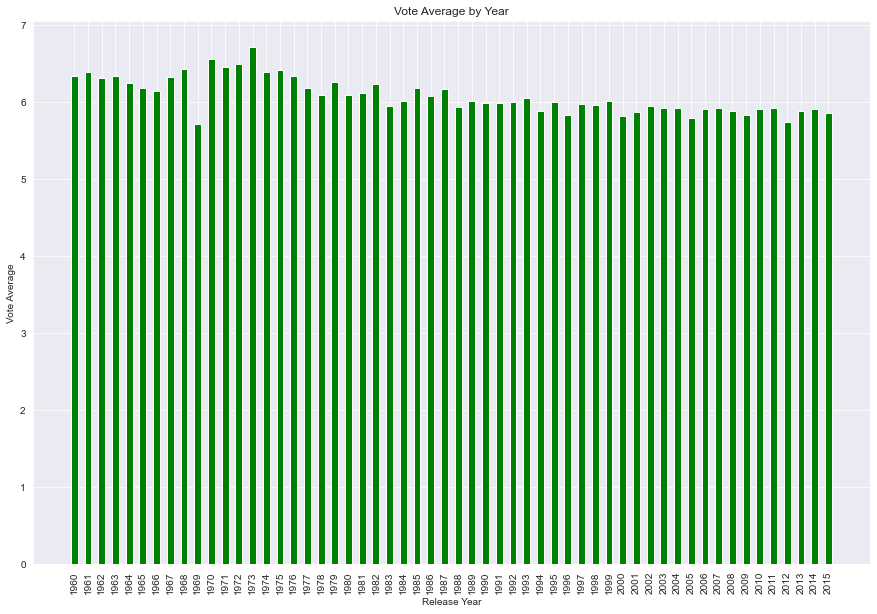

In [364]:
inds = indexs(df4)
widthx = 0.5
plt.figure(figsize=(15,10))
plt.bar(inds, df4, widthx, color = 'g');

# Rotation of the bars names
plt.xticks(inds, df4.index, rotation = 90);
plt.ylabel('Vote Average');
plt.xlabel('Release Year');
plt.title('Vote Average by Year');

### Observation:
The plot clearly shows the release year with the **highest and lowest vote average - *1973,1969 respectively*.** However, the difference in the average vote between all release year is marginal.

### Research Question 4: Which genre pulls in the most revenue?

In [365]:
df1.columns

Index(['popularity', 'revenue', 'genres', 'vote_count', 'vote_average',
       'release_year', 'movie_rank', 'budget'],
      dtype='object')

In [366]:
# creating a new data frame with the following columns: 'genres','popularity', 'release_year', 'revenue', 'vote count' and 'budget', not in that order
df1.columns
locd = np.r_[0,2,1,3,7]
df5 = df1.iloc[:,locd]

In [367]:
# filtering with genres, revenue and budget
genres_rev = df5.groupby('genres')['revenue'].sum()
genres_bud = df5.groupby('genres')['budget'].sum()

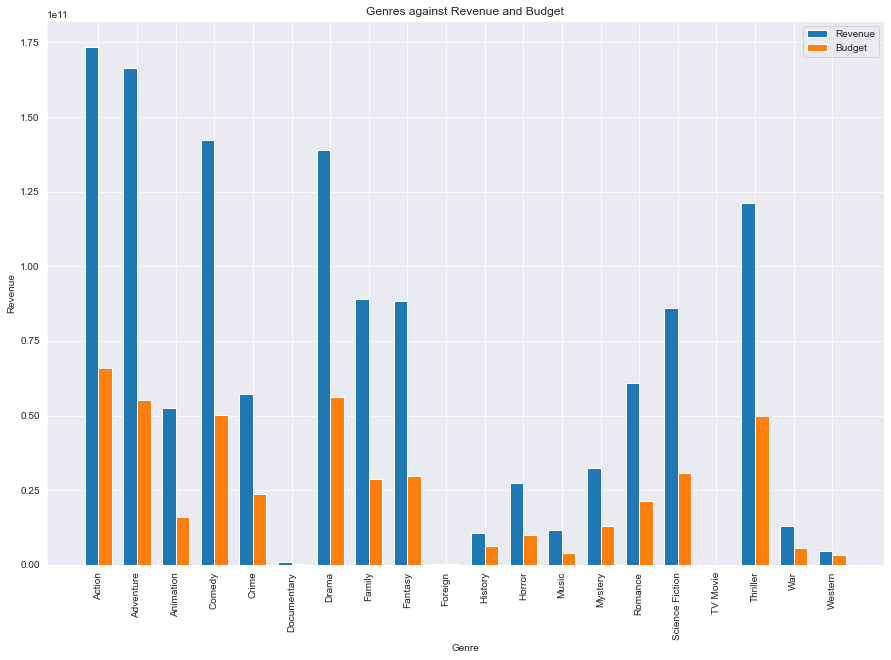

In [368]:
indx = indexs(genres_rev);
width = 0.35
plt.figure(figsize = (15,10));
plt.bar(indx,genres_rev, width, label = 'Revenue')
plt.bar(indx + width,genres_bud, width, label = 'Budget')
# Rotation of the bars names
plt.xticks(indx+ width/2, genres_rev.index, rotation = 90);
plt.ylabel('Revenue');
plt.xlabel('Genre');
plt.title('Genres against Revenue and Budget');
plt.legend();

### Observation:
The plots above shows the relationship between each genres with their budget and revenue, with the **action** genre generating the most revenue, followed by the **adventure** genre while **documentary, foreign, Tv Moive genres generated the least**.

### Research Question 5: Which year recorded the most revenue?

In [369]:
rev_yr = df2.groupby('release_year')['revenue'].sum()
rev_yr;

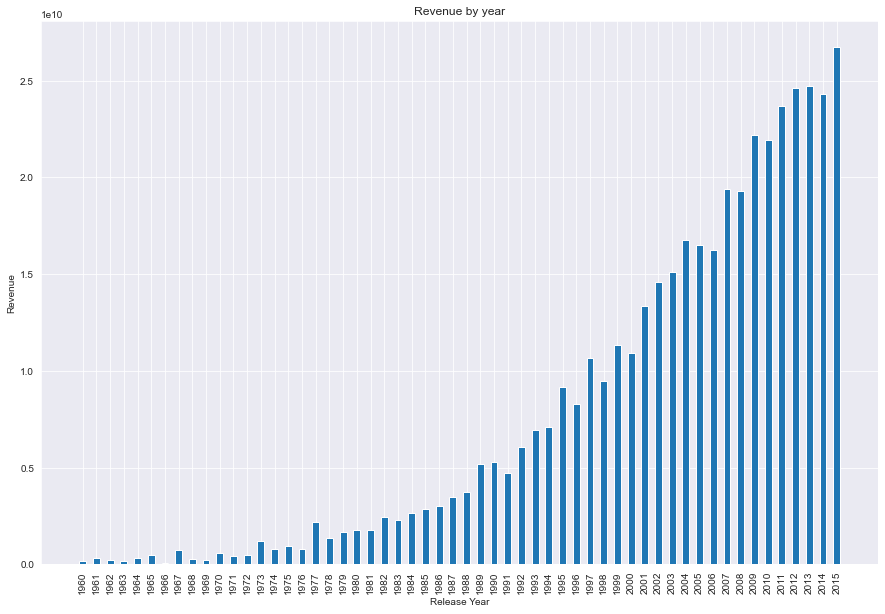

In [370]:
index = indexs(rev_yr);
width_ = 0.50
plt.figure(figsize = (15,10));
plt.bar(index,rev_yr, width_)
# Rotation of the bars names
plt.xticks(index, rev_yr.index, rotation = 90);
plt.ylabel('Revenue');
plt.xlabel('Release Year');
plt.title('Revenue by year');

### Observation:
The plots above shows the release year with the most and least generated revenue. With the **year 2015** securing first place and **year 1966** in last place. It also shows the fluctuation along the realease year.

### Research Question 6: Which genre is the most popular?

In [373]:
# For the overall popularity by genre
gen_pop = df5.groupby('genres')['popularity'].sum()

In [470]:
# Creating a function will perform a query on release year and groupby genre/popularity with the Foreign Genre 

def find_with(year1):
    a = df1.query('release_year == "{}"'.format(year1));
    a1 = a.groupby('genres')['popularity'].sum();
    return a1

# Creating a function will perform a query on release year and groupby genre/popularity without the Foreign Genre 

def find_without(year2):    
    b = df1.query('release_year == "{}"'.format(year2));
    b1 = b.groupby('genres')['popularity'].sum();
    b1['Foreign'] = 0
    b1 = b1.sort_index()
    return b1

In [463]:
pop_gen_2012 = find_with(2012);
pop_gen_2013 = find_without(2013);
pop_gen_2014 = find_without(2014);
pop_gen_2015 = find_without(2015);

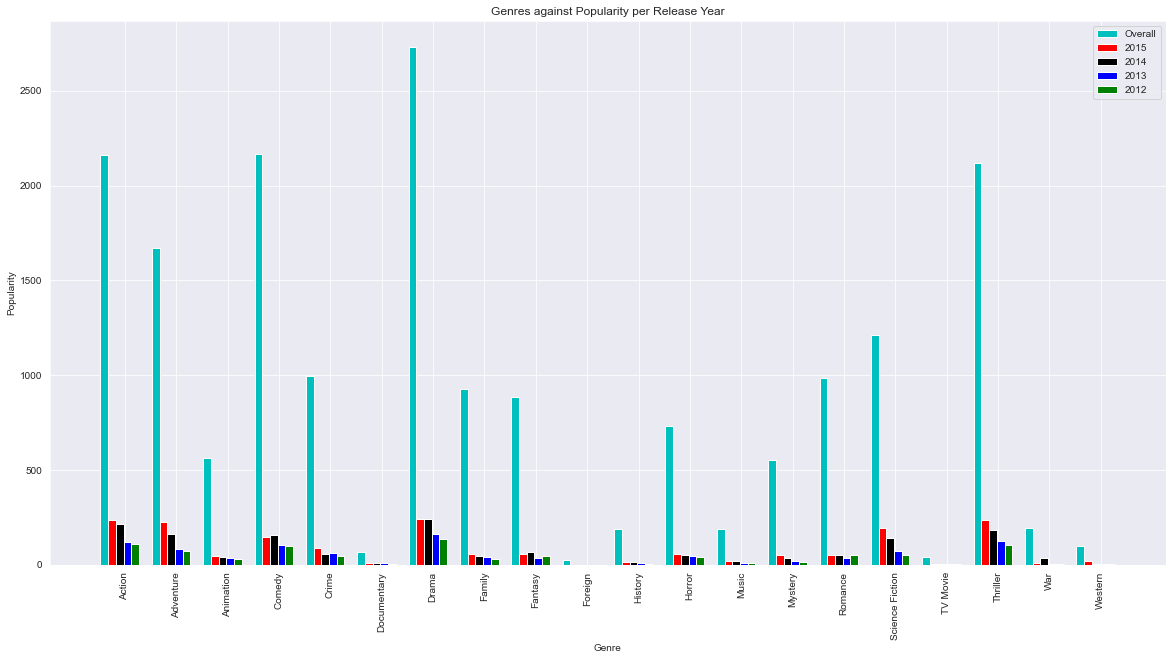

In [464]:
indxs = indexs(pop_gen_2012)
width_ = 0.15
plt.figure(figsize = (20,10))
plt.bar(indxs - width_,gen_pop, width_, color = 'c',label = 'Overall')
plt.bar(indxs, pop_gen_2015, width_, color = 'r', label = '2015');
plt.bar(indxs+width_, pop_gen_2014, width_, color = 'k', label = '2014');
plt.bar(indxs+width_*2, pop_gen_2013, width_, color = 'b', label = '2013');
plt.bar(indxs+width_*3, pop_gen_2012, width_, color = 'g', label = '2012');
plt.xticks(indxs + width_ + 0.1, pop_gen_2015.index, rotation = 90);
plt.title('Genres against Popularity per Release Year');
plt.ylabel('Popularity')
plt.xlabel('Genre')
plt.legend();


### Observation:
The plot above shows the genres with the most popularity. Overall, **drama** genre is the most popular. By considering each genres popularity by the release year, you would discover how this comes to be. The **drama** genre is the most popular by of aggregate of each year, with the **foreign** genre having the least, although, the genre does not exist in the latter years - 2013 to 2015

### Research Question 7: Which genre has the most average vote?

In [466]:
# For the overall vote average
gen_vot = df1.groupby('genres')['vote_average'].mean()

In [467]:
# Creating a function will perform a query on release year and groupby genre/vote_average with the Foreign Genre

def genre_with(year1):
    a = df1.query('release_year == "{}"'.format(year1));
    a1 = a.groupby('genres')['vote_average'].mean();
    return a1

# Creating a function will perform a query on release year and groupby genre/vote_average without the Foreign Genre 

def genre_without(year2):    
    b = df1.query('release_year == "{}"'.format(year2));
    b1 = b.groupby('genres')['vote_average'].mean();
    b1['Foreign'] = 0
    b1 = b1.sort_index()
    return b1

In [468]:
vot_gen_2012 = genre_with(2012);
vot_gen_2013 = genre_without(2013);
vot_gen_2014 = genre_without(2014);
vot_gen_2015 = genre_without(2015);

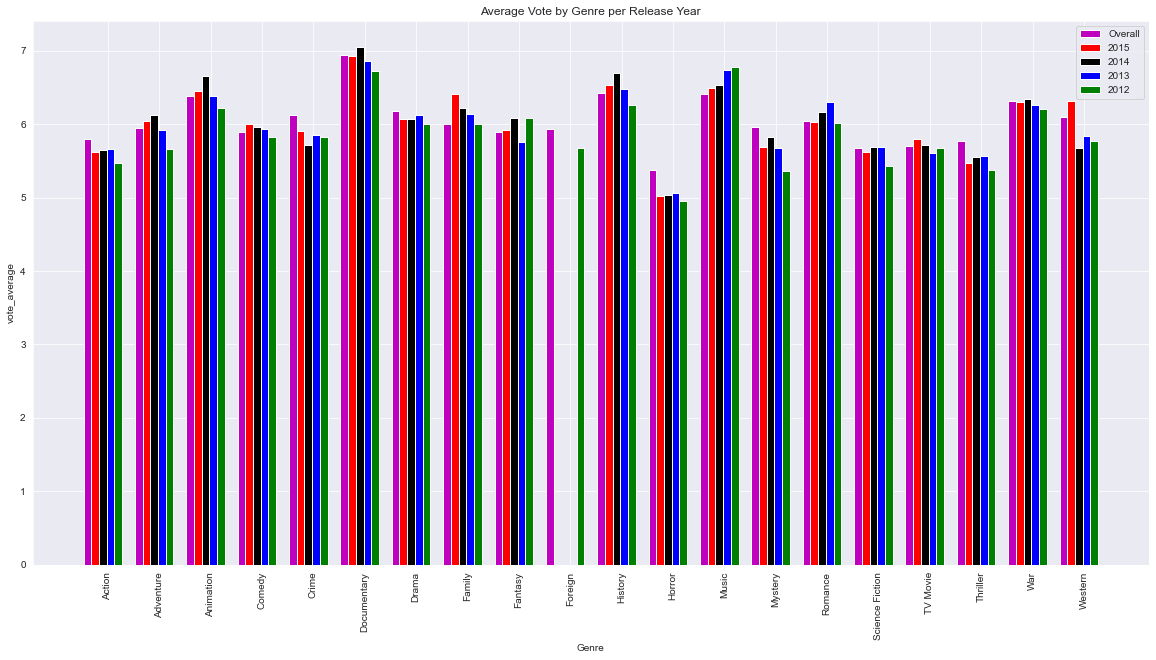

In [469]:
indxs_ = indexs(vot_gen_2012)
width_ = 0.15
plt.figure(figsize = (20,10))
plt.bar(indxs_ - width_ ,gen_vot, width_, color = 'm',label = 'Overall')
plt.bar(indxs_, vot_gen_2015, width_, color = 'r', label = '2015');
plt.bar(indxs_ + width_, vot_gen_2014, width_, color = 'k', label = '2014');
plt.bar(indxs_ + width_*2, vot_gen_2013, width_, color = 'b', label = '2013');
plt.bar(indxs_ + width_*3, vot_gen_2012, width_, color = 'g', label = '2012');
plt.xticks(indxs_ + width_ + 0.1, vot_gen_2012.index, rotation = 90);
plt.title('Average Vote by Genre per Release Year');
plt.ylabel('vote_average')
plt.xlabel('Genre')
plt.legend();


### Observation:
The plot above shows the genres with the most average vote. Overall, **documentary** genre has the highest while **horror** has the least. By considering each genres average vote by the release year, you would discover how this comes to be.

<a id='conclusions'></a>
## Conclusions

Despite the **action** genre generating the most revenue, it is not the most popular genre nor does it have the highest **average vote**. Additionally, the **documentary** genre which has the overall highest **average vote** generates on of the fewest revenue and is also one of least popular. **Drama** genre which is the most popular does not generate as much revenue as action but is one of the top five genres with high revenue. 

To sum up, there is no clear link between **vote average and popularity**. However,  it is visble that there is one between **popularity and revenue** generated. 

#### LIMITATIONS
Only few years was explored as visually representing all release years on one plot would have been too tedious to interprete.